In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os
os.environ["OMP_NUM_THREADS"]='1'

In [78]:
seedd=pd.read_csv("seeds.csv")

In [79]:
# displaying the first five rows

In [80]:
seedd.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernal,Asymmetry coefficient,Length of Kernel Grove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [81]:
# displaying the last five rows

In [82]:
seedd.tail()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernal,Asymmetry coefficient,Length of Kernel Grove
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063


In [83]:
# Displaying the count of different seed types

In [84]:
#seedd.iloc[:,6]

In [85]:
seedd.isnull().sum()

Area                      0
Perimeter                 0
Compactness               0
Length of Kernel          0
Width of Kernal           0
Asymmetry coefficient     0
Length of Kernel Grove    0
dtype: int64

In [86]:
seedd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    210 non-null    float64
 1   Perimeter               210 non-null    float64
 2   Compactness             210 non-null    float64
 3   Length of Kernel        210 non-null    float64
 4   Width of Kernal         210 non-null    float64
 5   Asymmetry coefficient   210 non-null    float64
 6   Length of Kernel Grove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [87]:
seedd.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernal,Asymmetry coefficient,Length of Kernel Grove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


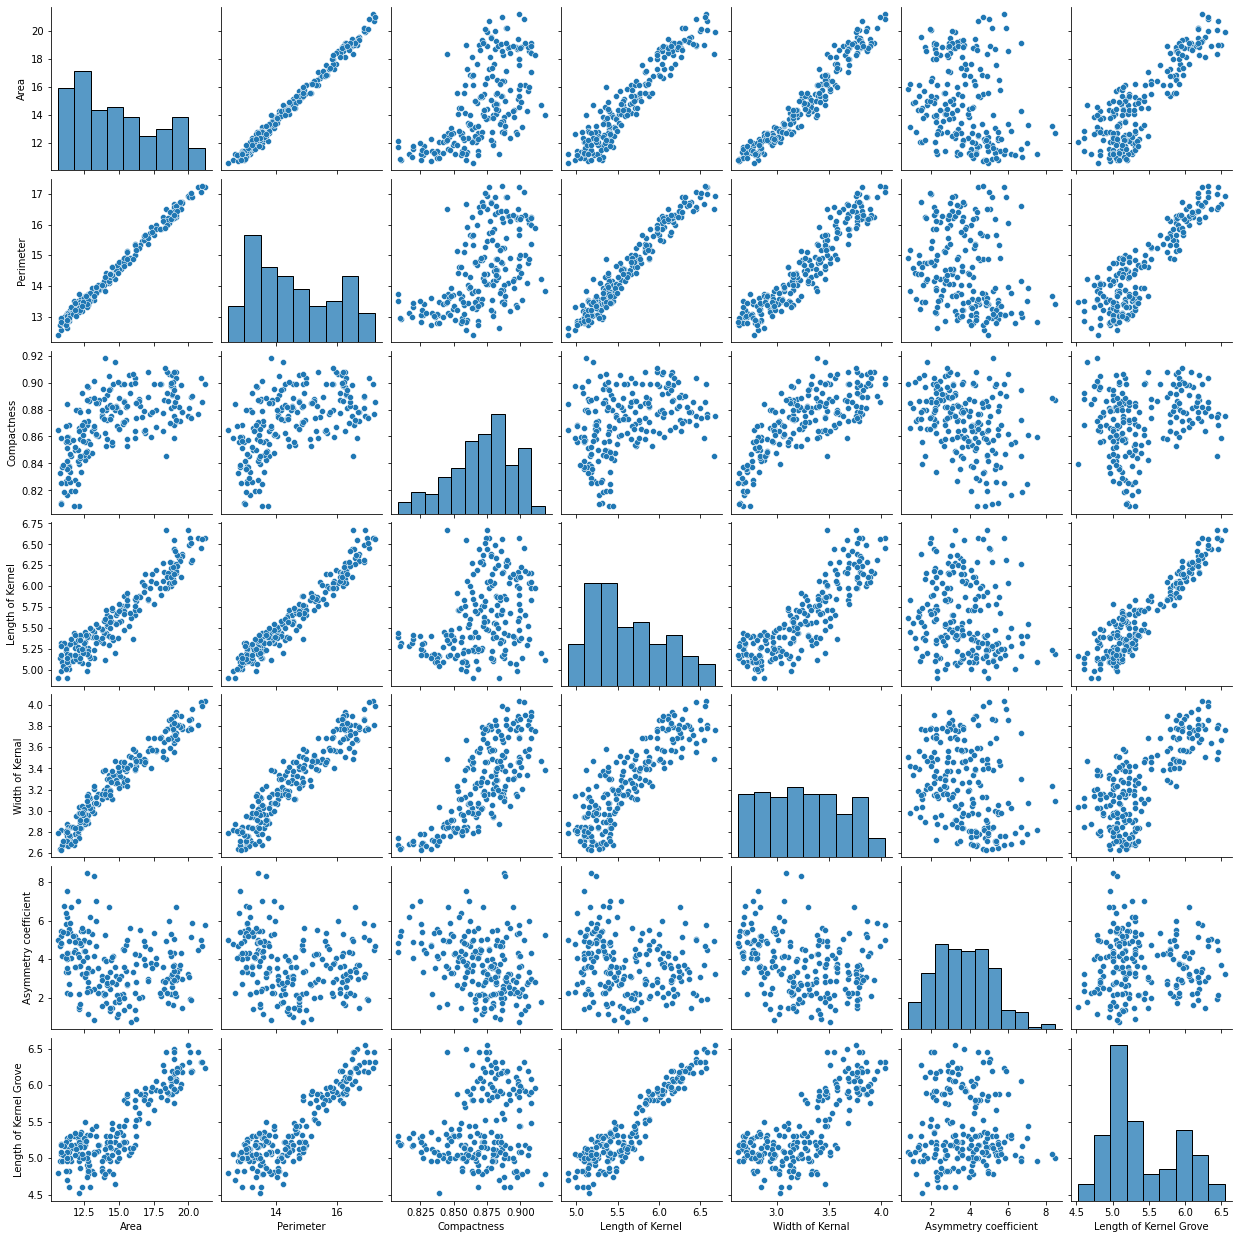

In [88]:
sns.pairplot(seedd.iloc[:,:])

In [89]:
# Standardisation of dataset

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
X=seedd.iloc[:,0:6].values


In [92]:
sc_X=StandardScaler()

In [93]:
X=sc_X.fit_transform(X)

In [94]:
# Elbow method to find the optimal number of clusters

In [95]:
from sklearn.cluster import KMeans

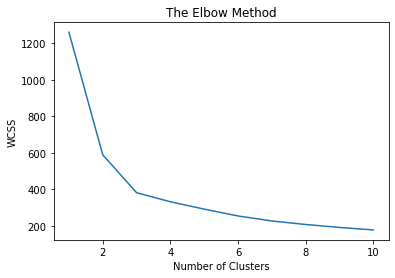

In [96]:

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
# Fitting Kmeans to the dataset

In [98]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [99]:
#Visualisation of clusters

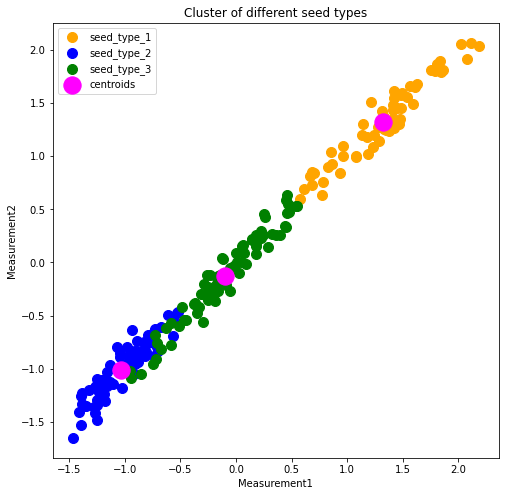

In [100]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='orange',label='seed_type_1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='seed_type_2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='seed_type_3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='magenta',label='centroids')
plt.title('Cluster of different seed types')
plt.xlabel('Measurement1')
plt.ylabel('Measurement2')
plt.legend()
plt.show()



In [101]:
# Applying Dimensionality Reduction Technique

In [102]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.72143204, 0.16970453])

In [103]:
sum(pca.explained_variance_ratio_)

0.8911365658185614

In [104]:
# Visualisation of cluster

In [105]:
colours=['red','orange','green']

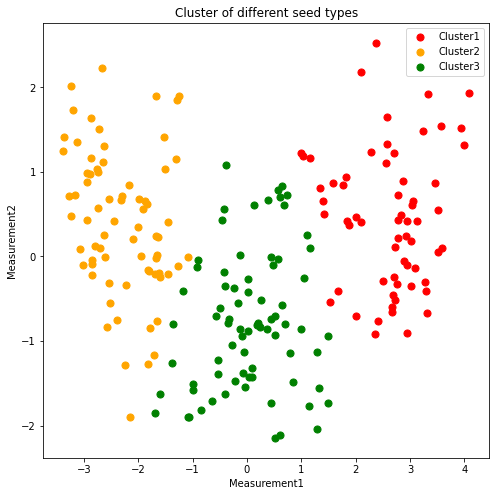

In [106]:
plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans==i,0],X_reduced[y_kmeans==i,1],
    s=50,c=colours[i],label='Cluster'+str(i+1))
plt.title('Cluster of different seed types')
plt.xlabel('Measurement1')
plt.ylabel('Measurement2')
plt.legend()
plt.show()

In [107]:
#****************************************Heirarchical clustering*******************************************************

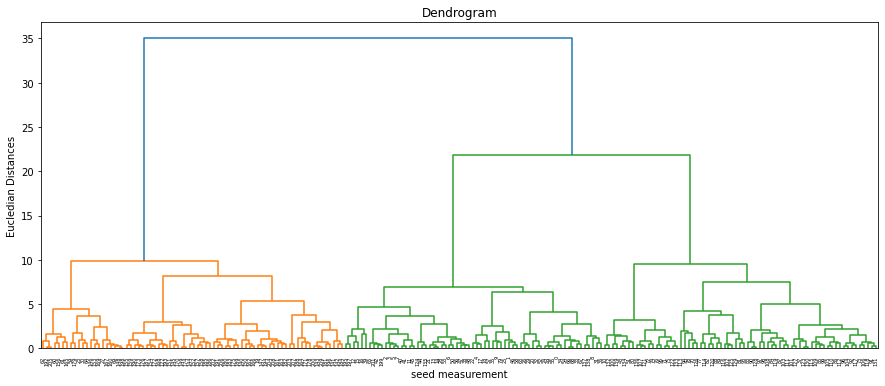

In [108]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('seed measurement')
plt.ylabel('Eucledian Distances')
plt.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [110]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.72143204, 0.16970453])

In [75]:
sum(pca.explained_variance_ratio_)

0.8911365658185614

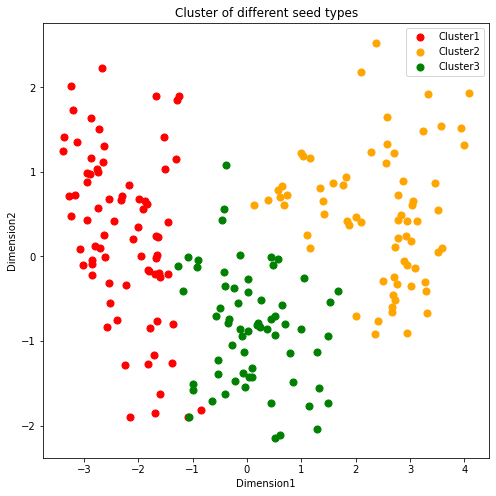

In [76]:
colours=['red','orange','green']
plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_hc==i,0],X_reduced[y_hc==i,1],
    s=50,c=colours[i],label='Cluster'+str(i+1))
plt.title('Cluster of different seed types')
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.legend()
plt.show()